# Rt Live Model

In [1]:
%load_ext autoreload
%autoreload 2

import pymc3 as pm
import pandas as pd
import numpy as np
import arviz as az
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
from matplotlib import pyplot as plt
from covid.models.generative import GenerativeModel
from covid.data import summarize_inference_data
%config InlineBackend.figure_format = 'retina'

from covid.data import get_and_process_covidtracking_data_il, get_and_process_covidtracking_data_ilsev, summarize_inference_data

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
Matplotlib created a temporary config/cache directory at /tmp/matplotlib-y52pszas because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


## Fetch data and select the state's data

In [2]:
df = get_and_process_covidtracking_data_il(run_date=pd.Timestamp.today())#-pd.Timedelta(days=1))
dfunn = get_and_process_covidtracking_data_il(run_date=pd.Timestamp.today(), norm=False)#-pd.Timedelta(days=1))
dfsev = get_and_process_covidtracking_data_ilsev(run_date=pd.Timestamp.today()-pd.Timedelta(days=1))

In [3]:
region = "Israel"
model_data = df.loc[region]
model_sev = dfsev.loc[region]
model_unn = dfunn.loc[region]

## Create the model instance and sample

In [4]:
gmsev = GenerativeModel(region, model_sev, buffer_days = 20, delay=5+5)
gmsev.sample()

Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, seed, log_r_t]


Sampling 4 chains for 700 tune and 200 draw iterations (2_800 + 800 draws total) took 3463 seconds.


In [5]:
gm = GenerativeModel(region, model_data, delay=5)
gm.sample()

Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, seed, log_r_t]


Sampling 4 chains for 700 tune and 200 draw iterations (2_800 + 800 draws total) took 3195 seconds.


In [6]:
gmunn = GenerativeModel(region, model_unn, delay=5)
gmunn.sample()

Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, seed, log_r_t]


Sampling 4 chains for 700 tune and 200 draw iterations (2_800 + 800 draws total) took 3233 seconds.


## Summarize Model Output

In [7]:
result = summarize_inference_data(gm.inference_data)
resultsev = summarize_inference_data(gmsev.inference_data)
resultunn = summarize_inference_data(gmunn.inference_data)

In [8]:
result.tail(60)

,mean,median,lower_80,upper_80,infections,test_adjusted_positive,test_adjusted_positive_raw,positive,tests
date,,,,,,,,,
2020-08-15,1.082174,1.082320,1.008894,1.151085,1779.269616,1858.124501,2234.707781,757,8864
2020-08-16,1.088499,1.087620,1.002338,1.150256,1803.042391,1852.394870,2404.818812,1068,11621
2020-08-17,1.098611,1.097989,1.015624,1.161429,1829.914402,1848.595410,1734.378448,1650,24894
2020-08-18,1.104190,1.101250,1.032548,1.179764,1859.709017,1846.883576,1611.196372,1649,26781
2020-08-19,1.106943,1.103602,1.027520,1.173041,1892.809670,1847.386276,1575.401860,1640,27240
2020-08-20,1.109678,1.109904,1.032627,1.179862,1929.112740,1850.264037,1397.191621,1487,27849
2020-08-21,1.111878,1.111205,1.017801,1.169237,1967.604146,1855.700091,1481.958565,1493,26362
2020-08-22,1.114310,1.113816,1.043480,1.194666,2007.764040,1863.848594,1768.681995,711,10519
2020-08-23,1.116912,1.113903,1.039497,1.187687,2049.582135,1874.826983,2002.791421,965,12608


In [9]:
resultunn.tail(60)

,mean,median,lower_80,upper_80,infections,test_adjusted_positive,test_adjusted_positive_raw,positive,tests
date,,,,,,,,,
2020-08-15,1.224082,1.218794,1.124329,1.310291,1623.454486,1478.742485,757.0,757,100000
2020-08-16,1.238404,1.235015,1.145885,1.327097,1684.132373,1486.662708,1068.0,1068,100000
2020-08-17,1.251253,1.251483,1.155770,1.345941,1751.976638,1498.108281,1650.0,1650,100000
2020-08-18,1.264311,1.260463,1.182377,1.365344,1827.022140,1513.376901,1649.0,1649,100000
2020-08-19,1.275273,1.273718,1.193892,1.379700,1909.452173,1532.783869,1640.0,1640,100000
2020-08-20,1.285736,1.283122,1.189376,1.373824,1999.786330,1556.634461,1487.0,1487,100000
2020-08-21,1.295118,1.291131,1.205445,1.393723,2098.471020,1585.225468,1493.0,1493,100000
2020-08-22,1.298107,1.299680,1.200366,1.387235,2205.848255,1618.895622,711.0,711,100000
2020-08-23,1.299520,1.300527,1.204906,1.391000,2322.244510,1658.013371,965.0,965,100000


In [10]:
resultsev.tail(30)

,mean,median,lower_80,upper_80,infections,test_adjusted_positive,test_adjusted_positive_raw,positive,tests
date,,,,,,,,,
2020-09-13,1.011409,1.011334,0.938287,1.106869,85.150826,71.463332,65.0,65.0,10000
2020-09-14,0.998773,0.998424,0.899540,1.073586,85.618201,73.803797,75.0,75.0,10000
2020-09-15,0.990141,0.984470,0.894383,1.072187,85.861179,76.198248,62.0,62.0,10000
2020-09-16,0.981294,0.978734,0.895029,1.076392,85.902839,78.628961,88.0,88.0,10000
2020-09-17,0.973654,0.968678,0.873488,1.063924,85.777040,81.075792,91.0,91.0,10000
2020-09-18,0.968746,0.965449,0.867452,1.055431,85.511875,83.516543,83.0,83.0,10000
2020-09-19,0.962674,0.957608,0.864040,1.053929,85.120618,85.926705,86.0,86.0,10000
2020-09-20,0.958388,0.952941,0.834254,1.040698,84.634425,88.281492,80.0,80.0,10000
2020-09-21,0.956053,0.953946,0.838730,1.055160,84.069942,90.556766,115.0,115.0,10000


## Plot Model Output

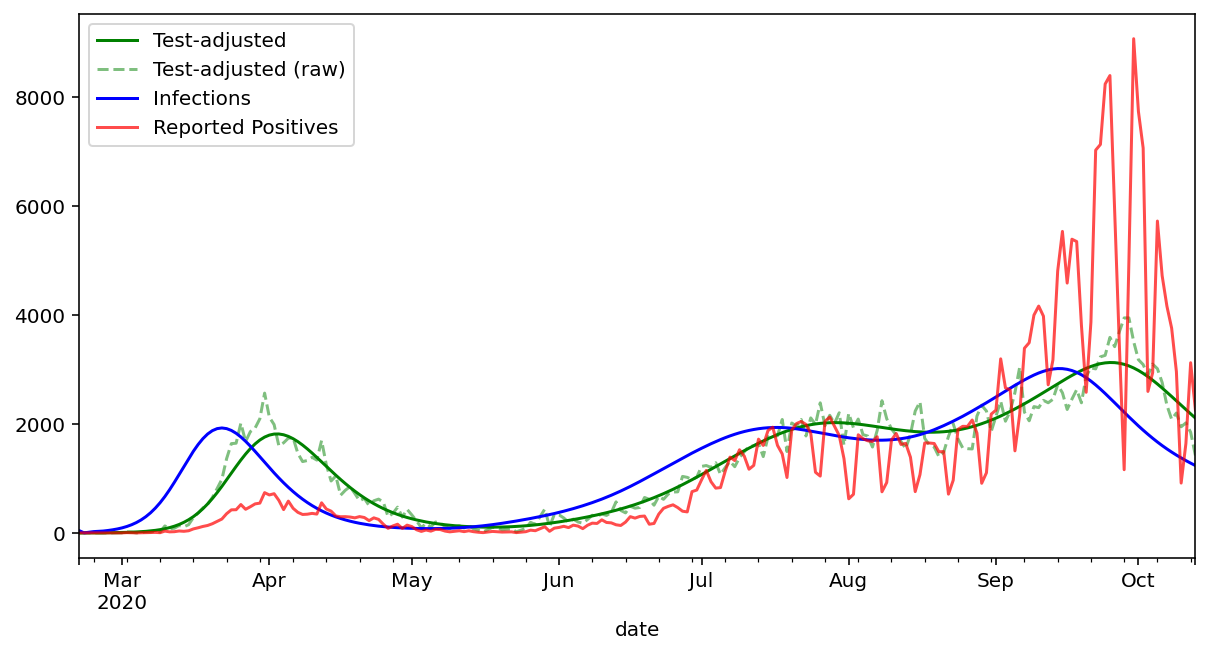

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
result.test_adjusted_positive.plot(c="g", label="Test-adjusted")
result.test_adjusted_positive_raw.plot(c="g", alpha=.5, label="Test-adjusted (raw)", style="--")
result.infections.plot(c="b", label="Infections")
gm.observed.positive.plot(c='r', alpha=.7, label="Reported Positives")
fig.set_facecolor('w')
ax.legend();

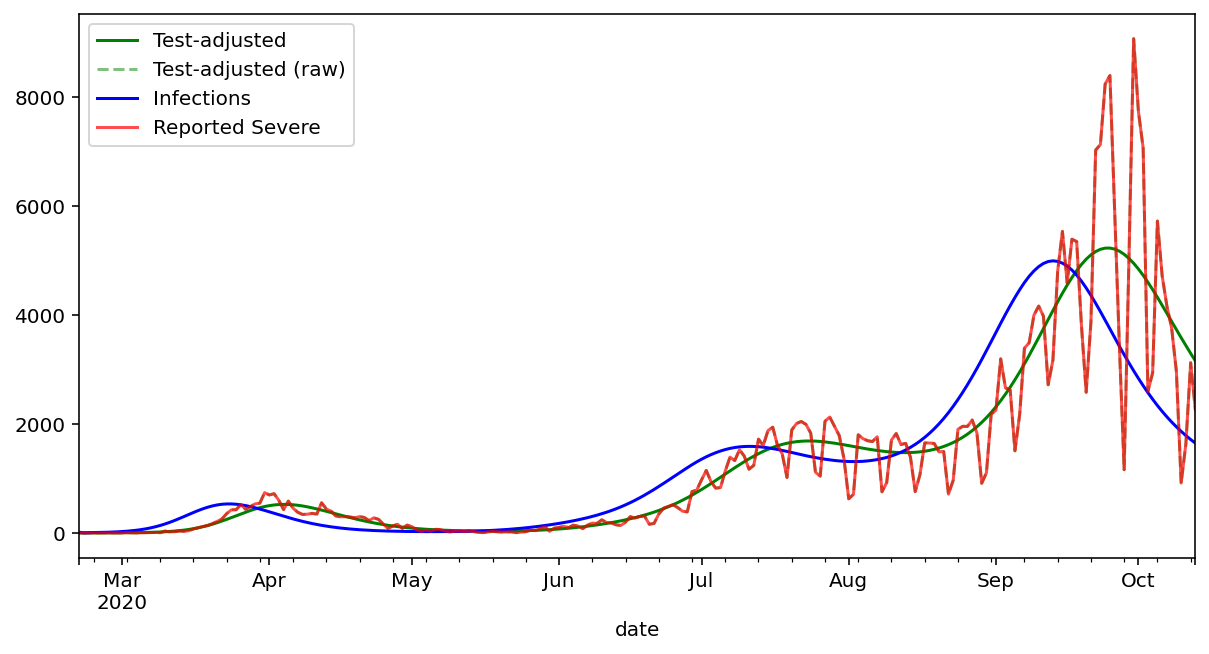

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
resultunn.test_adjusted_positive.plot(c="g", label="Test-adjusted")
resultunn.test_adjusted_positive_raw.plot(c="g", alpha=.5, label="Test-adjusted (raw)", style="--")
resultunn.infections.plot(c="b", label="Infections")
gmunn.observed.positive.plot(c='r', alpha=.7, label="Reported Severe")
fig.set_facecolor('w')
ax.legend();

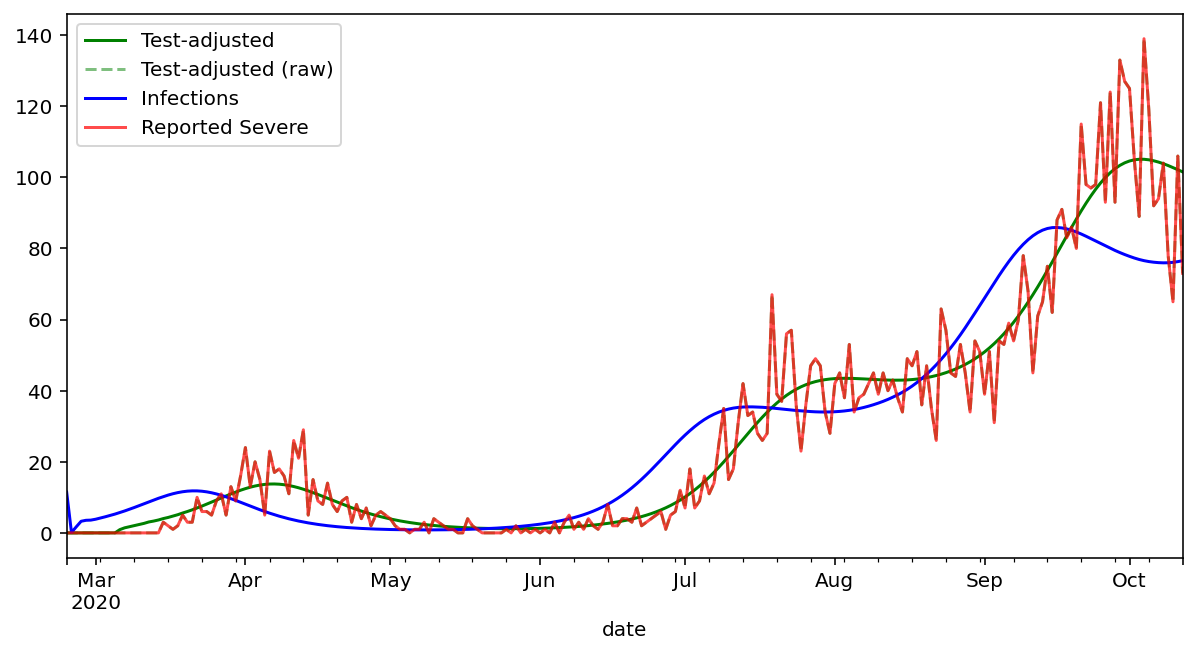

In [13]:
fig, ax = plt.subplots(figsize=(10,5))
resultsev.test_adjusted_positive.plot(c="g", label="Test-adjusted")
resultsev.test_adjusted_positive_raw.plot(c="g", alpha=.5, label="Test-adjusted (raw)", style="--")
resultsev.infections.plot(c="b", label="Infections")
gmsev.observed.positive.plot(c='r', alpha=.7, label="Reported Severe")
fig.set_facecolor('w')
ax.legend();

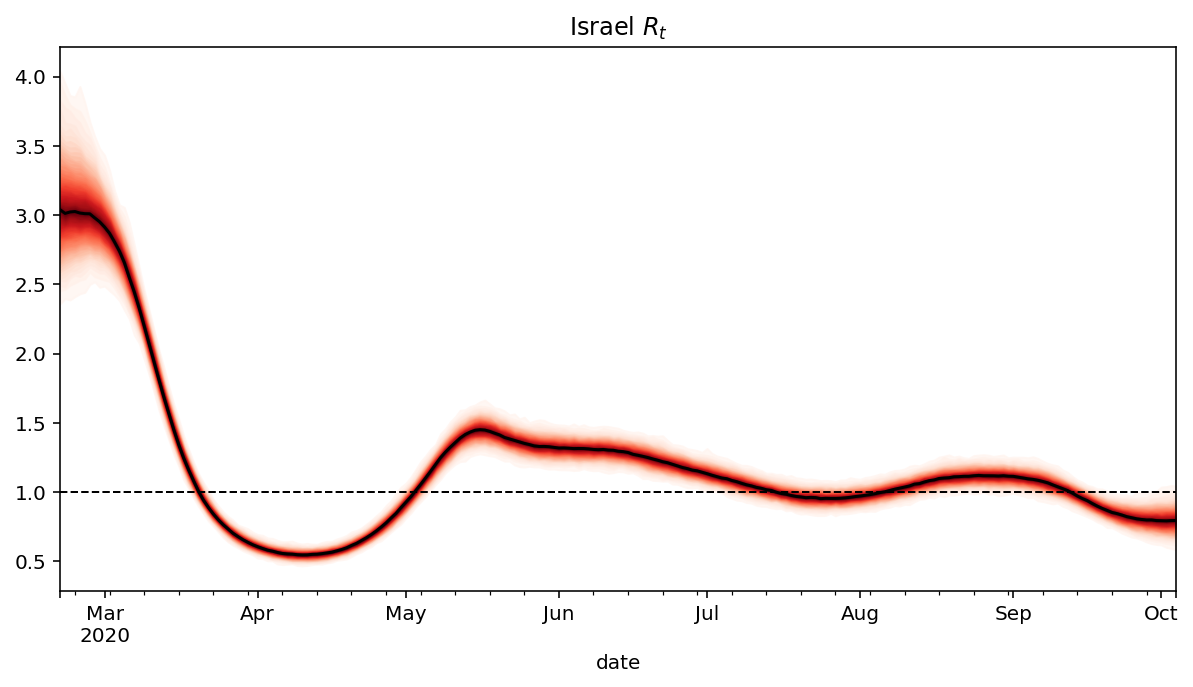

In [14]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_title(f"{region} $R_t$")
samples = gm.trace['r_t']
x=result.index
cmap = plt.get_cmap("Reds")
percs = np.linspace(51, 99, 40)
colors = (percs - np.min(percs)) / (np.max(percs) - np.min(percs))
samples = samples.T

result["median"].plot(c="k", ls='-')

for i, p in enumerate(percs[::-1]):
    upper = np.percentile(samples, p, axis=1)
    lower = np.percentile(samples, 100-p, axis=1)
    color_val = colors[i]
    ax.fill_between(x, upper, lower, color=cmap(color_val), alpha=.8)

ax.axhline(1.0, c="k", lw=1, linestyle="--")
ax.set_xlim(right=pd.Timestamp.today()-pd.Timedelta(days=10))
#ax.set_xlim(left = pd.Timestamp.today()-pd.Timedelta(days=70), right=pd.Timestamp.today()-pd.Timedelta(days=10))
#ax.set_ylim(top = 2)
fig.set_facecolor('w')

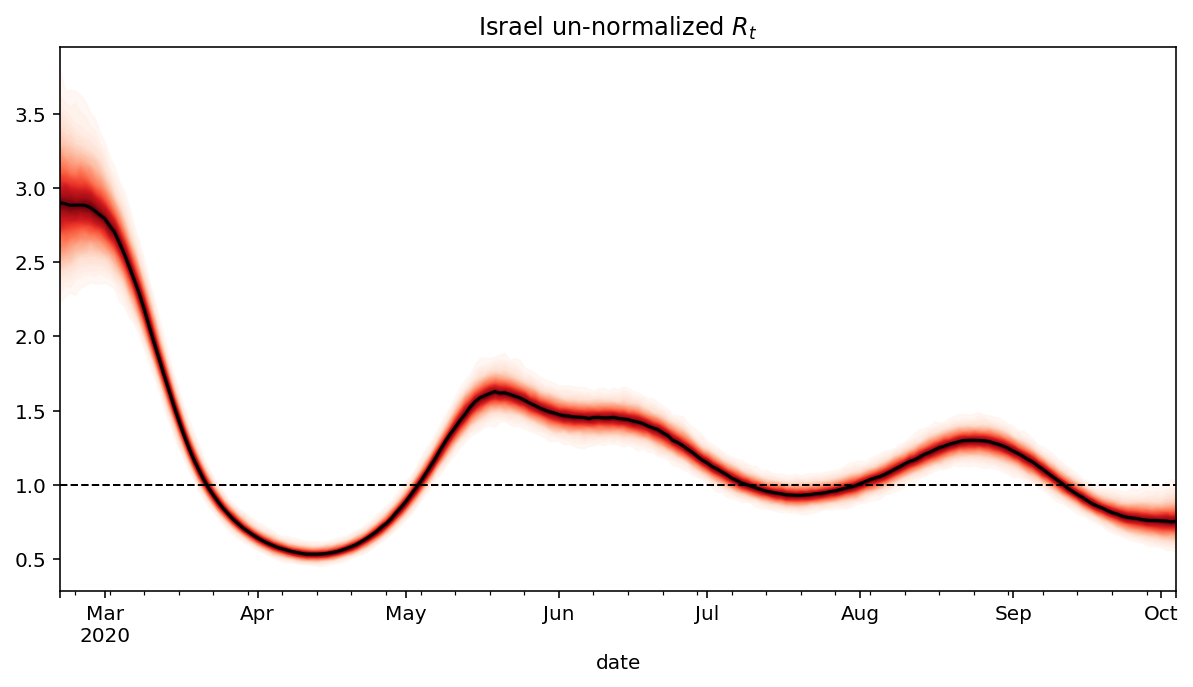

In [15]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_title(f"{region} un-normalized $R_t$")
samples = gmunn.trace['r_t']
x=result.index
cmap = plt.get_cmap("Reds")
percs = np.linspace(51, 99, 40)
colors = (percs - np.min(percs)) / (np.max(percs) - np.min(percs))
samples = samples.T

resultunn["median"].plot(c="k", ls='-')

for i, p in enumerate(percs[::-1]):
    upper = np.percentile(samples, p, axis=1)
    lower = np.percentile(samples, 100-p, axis=1)
    color_val = colors[i]
    ax.fill_between(x, upper, lower, color=cmap(color_val), alpha=.8)

ax.axhline(1.0, c="k", lw=1, linestyle="--")
ax.set_xlim(right=pd.Timestamp.today()-pd.Timedelta(days=10))
#ax.set_xlim(left = pd.Timestamp.today()-pd.Timedelta(days=70), right=pd.Timestamp.today()-pd.Timedelta(days=10))
#ax.set_ylim(top = 2)
fig.set_facecolor('w')

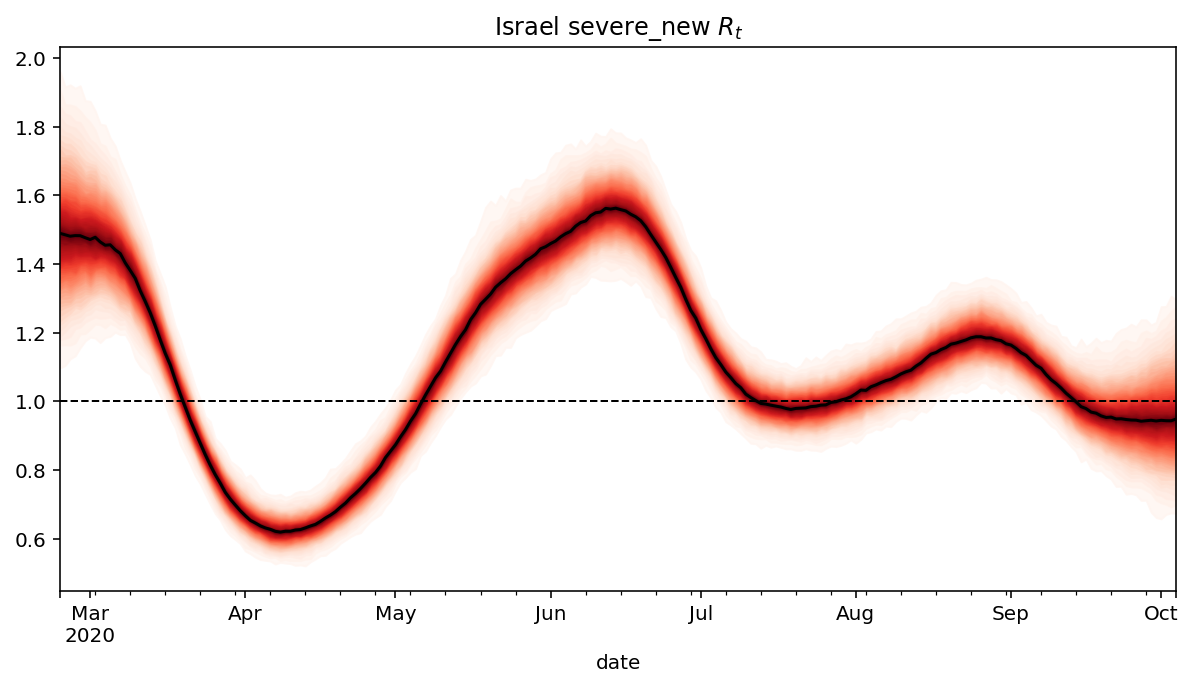

In [16]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_title(f"{region} severe_new $R_t$")
samples = gmsev.trace['r_t']
x=resultsev.index
cmap = plt.get_cmap("Reds")
percs = np.linspace(51, 99, 40)
colors = (percs - np.min(percs)) / (np.max(percs) - np.min(percs))
samples = samples.T

resultsev["median"].plot(c="k", ls='-')

for i, p in enumerate(percs[::-1]):
    upper = np.percentile(samples, p, axis=1)
    lower = np.percentile(samples, 100-p, axis=1)
    color_val = colors[i]
    ax.fill_between(x, upper, lower, color=cmap(color_val), alpha=.8)

ax.axhline(1.0, c="k", lw=1, linestyle="--")
ax.set_xlim(right=pd.Timestamp.today()-pd.Timedelta(days=10))
fig.set_facecolor('w')